<a href="https://colab.research.google.com/github/ANSHULAGARWAL09/Information-Extraction-with-Knowledge-Graph/blob/master/Information_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information extraction is a technique of extracting structured information from unstructured text. A knowledge graph is a way of storing data that resulted from an information extraction task.

 Information extracted and prepared a small knowledge graph that will contain structured information extracted from unstructured text taken from WHO on COVID-19. 

Here we will see two methods for Information Extraction:
1. spaCy’s Rule-Based Matching
2. Subtree Matching for Relation Extraction

**1.Spacy's Rule-Based Matching**

In [0]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
def getSentences(text):
    nlp = English()
    nlp.add_pipe(nlp.create_pipe('sentencizer'))
    document = nlp(text)
    return [sent.string.strip() for sent in document.sents]

In [0]:
def printToken(token):
    print(token.text, "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk


In [0]:
def isRelationCandidate(token):
    deps = ["adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)


In [0]:
def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, token.text)
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, token.text)
        if "subj" in token.dep_:
            subject = appendChunk(subject, token.text)
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, token.text)
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''

    print (subject.strip(), ",", relation.strip(), ",", object.strip())
    return (subject.strip(), relation.strip(), object.strip())

In [0]:
def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)
 

In [0]:
def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=3,
            node_size=450, node_color='pink',  alpha=0.8,
            labels={node: node for node in G.nodes()})
    plt.axis('auto')
    plt.show()

Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.The best way to prevent and slow down transmission, is be well informed about the disease and how it's spreading. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette. There are no specific vaccines or treatments. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information.
Coronavirus -> compound
disease -> nsubj
( -> punct
COVID-19 -> appos
) -> punct
is -> ROOT
an -> det
infectious -> amod
disease -> att

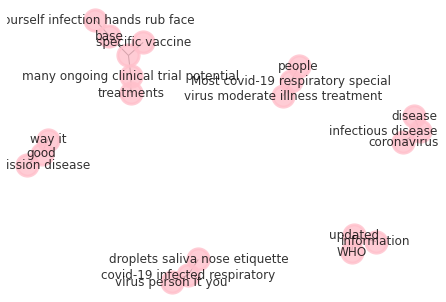

In [296]:
text = "Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.The best way to prevent and slow down transmission, is be well informed about the disease and how it's spreading. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face.The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette. There are no specific vaccines or treatments. However, there are many ongoing clinical trials evaluating potential treatments. WHO will continue to provide updated information."

sentences = getSentences(text)
nlp_model = spacy.load('en_core_web_sm')

triples = []
print (text)
for sentence in sentences:
    triples.append(processSentence(sentence))

printGraph(triples)


**2. Subtree Matching for Relation Extraction**

In [0]:
from spacy import displacy

In [0]:
nlp = spacy.load("en_core_web_sm")

In [0]:
def subtree_matcher(doc): 
  x = '' 
  y = '' 
  
  # iterate through all the tokens in the input sentence 
  for i,tok in enumerate(doc): 
    # extract subject 
    if tok.dep_.find("subjpass") == True: 
      y = tok.text 
      
    # extract object 
    if tok.dep_.endswith("obj") == True: 
      x = tok.text 
      
  return x,y

In [307]:
doc = "Tableau was recently acquired by Salesforce." 
doc = nlp(text) 
subtree_matcher(doc)

for tok in doc: 
  print(tok.text,"-->",tok.dep_,"-->",tok.pos_)

Tableau --> nsubjpass --> PROPN
was --> auxpass --> AUX
recently --> advmod --> ADV
acquired --> ROOT --> VERB
by --> agent --> ADP
Salesforce --> pobj --> PROPN
. --> punct --> PUNCT


In [308]:
displacy.render(doc, style='dep',jupyter=True)

All we have to check is which dependency paths are common between multiple sentences. This method is known as Subtree matching.